# Welcome

This is my second script where I will further explore the astronomy api in weatherapi.com

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

In [2]:
api_key = "57062ddc0e9d492691c162324231409"
params = { 'key':api_key , 'q':'Calgary'}

Lets first analyze what is given in the call

In [3]:
sample_response = requests.get("http://api.weatherapi.com/v1/astronomy.json", params=params)
print(sample_response.status_code)

200


In [4]:
str_sample_response = json.dumps(obj=sample_response.json(), indent=2)
print(str_sample_response)

{
  "location": {
    "name": "Calgary",
    "region": "Alberta",
    "country": "Canada",
    "lat": 51.08,
    "lon": -114.08,
    "tz_id": "America/Edmonton",
    "localtime_epoch": 1694787704,
    "localtime": "2023-09-15 8:21"
  },
  "astronomy": {
    "astro": {
      "sunrise": "07:12 AM",
      "sunset": "07:51 PM",
      "moonrise": "07:42 AM",
      "moonset": "08:15 PM",
      "moon_phase": "Waxing Crescent",
      "moon_illumination": "0",
      "is_moon_up": 1,
      "is_sun_up": 1
    }
  }
}


# Idea 1: Plotting Rises and Sets

- Plot sunrise/sunset over a year
- Plot moonrise/moonset over a year

Lets try this process:
1. Collect the data and save it to a .csv on local host
2. Load the .csv and plot

This will allow me to only have to make the API calls once. Lets begin :)

## Part 1: Data collection

In [5]:
# First off, we actually want historical data

params = { 'key':api_key , 'q':'Calgary', 'dt':'2023-09-13' }
sample_response = requests.get("http://api.weatherapi.com/v1/history.json", params=params)
print(json.dumps(sample_response.json(), indent=2))

{
  "location": {
    "name": "Calgary",
    "region": "Alberta",
    "country": "Canada",
    "lat": 51.08,
    "lon": -114.08,
    "tz_id": "America/Edmonton",
    "localtime_epoch": 1694787709,
    "localtime": "2023-09-15 8:21"
  },
  "forecast": {
    "forecastday": [
      {
        "date": "2023-09-13",
        "date_epoch": 1694563200,
        "day": {
          "maxtemp_c": 22.5,
          "maxtemp_f": 72.5,
          "mintemp_c": 10.5,
          "mintemp_f": 50.9,
          "avgtemp_c": 15.4,
          "avgtemp_f": 59.8,
          "maxwind_mph": 5.4,
          "maxwind_kph": 8.6,
          "totalprecip_mm": 0.0,
          "totalprecip_in": 0.0,
          "avgvis_km": 9.9,
          "avgvis_miles": 6.0,
          "avghumidity": 63.0,
          "condition": {
            "text": "Thundery outbreaks possible",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/200.png",
            "code": 1087
          },
          "uv": 5.0
        },
        "astro": {
          "su

In [6]:
astro = sample_response.json()['forecast']['forecastday'][0]['astro']
print(astro)

{'sunrise': '07:08 AM', 'sunset': '07:55 PM', 'moonrise': '05:21 AM', 'moonset': '07:53 PM', 'moon_phase': 'Waning Crescent', 'moon_illumination': '4'}


In [41]:
# Great! We will create the loop to collect the data
data_list = [['sunrise', 'sunset', 'moonrise', 'moonset', 'moon_illumination']]
start_date = dt.date.today() - dt.timedelta(days=365)
date_increment = dt.timedelta(days=1)
end_date = dt.date.today()

2022-09-15
2023-09-15


In [91]:
def convertTo24hr(time) :
    return_time = time
    try :
        return_time = datetime.strptime(time, '%I:%M %p').strftime('%H:%M')
    except :
        print(time)
    return return_time

In [105]:
def getDesiredList(response) :
    temp_date = response.json()['forecast']['forecastday'][0]['date']
    temp_astro = response.json()['forecast']['forecastday'][0]['astro']
    temp_list = [temp_date, temp_astro['sunrise'], temp_astro['sunset'], temp_astro['moonrise'], temp_astro['moonset'], temp_astro['moon_illumination']]
    return_list = [temp_date]
    for time in temp_list[1:5] : return_list.append(convertTo24hr(time)) 
    return_list.append(temp_list[5])
    return return_list

In [109]:
data_list = [['date','sunrise', 'sunset', 'moonrise', 'moonset', 'moon_illumination']]
current_date = start_date
end_date = start_date + dt.timedelta(days=365)
params = { 'key':str(api_key) , 'q':'Calgary', 'dt':current_date.isoformat() }
while current_date < end_date :
    #current_response = requests.get('http://api.weatherapi.com/v1/history.json', params=params)
    #data_list.append(getDesiredList(current_response))
    print(current_date)
    current_date += date_increment
    params['dt'] = current_date.isoformat()

2022-09-15
2022-09-16
2022-09-17
2022-09-18
No moonrise
2022-09-19
2022-09-20
2022-09-21
2022-09-22
2022-09-23
2022-09-24
2022-09-25
2022-09-26
2022-09-27
2022-09-28
2022-09-29
2022-09-30
2022-10-01
2022-10-02
No moonset
2022-10-03
2022-10-04
2022-10-05
2022-10-06
2022-10-07
2022-10-08
2022-10-09
2022-10-10
2022-10-11
2022-10-12
2022-10-13
2022-10-14
2022-10-15
2022-10-16
2022-10-17
No moonrise
2022-10-18
2022-10-19
2022-10-20
2022-10-21
2022-10-22
2022-10-23
2022-10-24
2022-10-25
2022-10-26
2022-10-27
2022-10-28
2022-10-29
2022-10-30
2022-10-31
No moonset
2022-11-01
2022-11-02
2022-11-03
2022-11-04
2022-11-05
2022-11-06
2022-11-07
2022-11-08
2022-11-09
2022-11-10
2022-11-11
2022-11-12
2022-11-13
2022-11-14
2022-11-15
No moonrise
2022-11-16
2022-11-17
2022-11-18
2022-11-19
2022-11-20
2022-11-21
2022-11-22
2022-11-23
2022-11-24
2022-11-25
2022-11-26
2022-11-27
2022-11-28
2022-11-29
No moonset
2022-11-30
2022-12-01
2022-12-02
2022-12-03
2022-12-04
2022-12-05
2022-12-06
2022-12-07
2022-12

In [110]:
df = pd.DataFrame(data=data_list[1:], columns=data_list[0])
#df.to_csv('astro_data.csv')

Great! Hopefully, I don't have to generate this data again!
I commented out the things that could really mess with things if I accidentally run all the blocks for whatever reason.

## Plotting!

Lets try plotting all this fun data that I got. I am going to import the .csv that I just exported incase I want to return to this code and not have to regenerate anything

In [123]:
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('astro_data.csv')

### Moon Illumination

In [125]:
# Lets start by checking for any anomalies
print(len(df))
print(pd.unique(df['moon_illumination']))

365
[ 77  68  59  49  40  31  22  15   9   4   1   0   5  11  18  28  39  50
  61  72  82  90  96  99 100  95  83  75  66  57  47  38  29  20  13   7
   3   8  16  25  36  58  69  79  87  93  98  94  88  81  73  65  55  46
  27   2   6  32  43  54  97  80  63  44  34  24  10  60  70  86  92  51
  41  30  21  12  14  23  33  64  91  84  76  67  37  56  89  62  19  42
  78  45  26  35  53  48  71  85  17]


AttributeError: module 'matplotlib.pyplot' has no attribute 'tickparams'

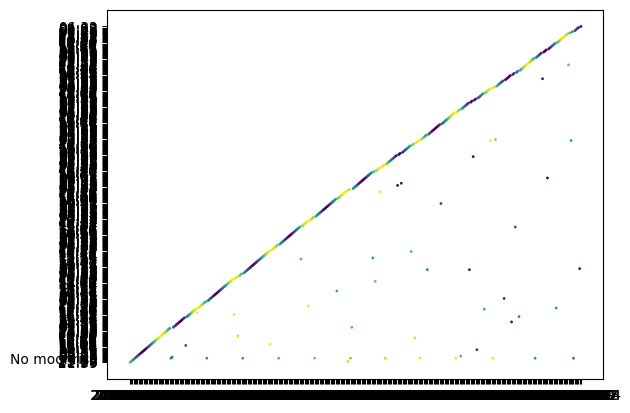

In [134]:
plt.scatter('date', 'moonrise', c='moon_illumination', s=1, data=df)
plt.tickparams(left=False)
plt.show()